In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = yf.download("NVDA", start = "2024-1-1", end = "2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.146572,49.273070,47.573829,49.222094,411254000
2024-01-03,47.547840,48.162564,47.298950,47.463878,320896000
2024-01-04,47.976654,48.478430,47.486870,47.745754,306535000
2024-01-05,49.075165,49.524965,48.284516,48.440449,415039000
2024-01-08,52.229759,52.251753,49.456995,49.489981,642510000


In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    ADF_Statistics = result[0]
    p_value = result[1]
    print(ADF_Statistics)
    print(p_value)
    if p_value < 0.05:
        print("Data is stationary and we accept the null hypothesis and reject the alternative hypothesis")
    else : 
        print("Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis")

In [5]:
Open_price = data["Open"]
adf_test(Open_price)

-1.9320334091741078
0.31714483671643573
Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis


In [6]:
Open_price.diff()

Ticker,NVDA
Date,
2024-01-02,NaN
2024-01-03,-1.758216
2024-01-04,0.281876
2024-01-05,0.694695
2024-01-08,1.049532
...,...
2024-12-23,6.468951
2024-12-24,3.719413
2024-12-26,-0.299956


In [7]:
import numpy as np
from scipy import stats

In [8]:
#Log transformation
Open_price_log = np.log(Open_price)
adf_test(Open_price_log)

-3.0604542277820004
0.029621570867505227
Data is stationary and we accept the null hypothesis and reject the alternative hypothesis


In [9]:
# Square root  transformation
Open_price_sqrt = np.sqrt(Open_price)
adf_test(Open_price_sqrt)

-2.453769613842533
0.12713155228185374
Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis


In [10]:
#Differencing
diff_price_sqrt = Open_price.diff()
adf_test(diff_price_sqrt.dropna())

-12.500711502672754
2.8106550368831104e-23
Data is stationary and we accept the null hypothesis and reject the alternative hypothesis


In [11]:
2.8106271961423106e-23 < 0.05

True

In [15]:
#Detrending
#Decomposition using Trend line
import numpy as np
from statsmodels.tsa.stattools import adfuller

Open_price = data['Open'].values.flatten()
trend = np.polyfit(np.arange(len(Open_price)), Open_price, 1)
trendline = np.polyval(trend, np.arange(len(Open_price)))
prices_detrended = Open_price - trendline  

adf_test(prices_detrended)  

-2.6375000625638534
0.08549176572503109
Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis


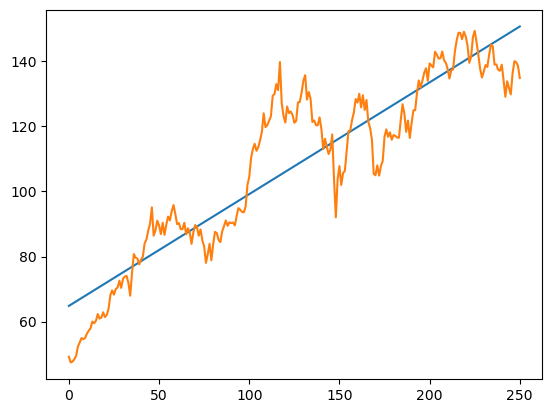

In [21]:
plt.plot(np.arange(len(Open_price)), trendline)
plt.plot(np.arange(len(Open_price)), Open_price)
plt.show()

In [25]:
# Moving average
Open_price = data["Open"]
Open_price_ma = Open_price.rolling(window = 12).mean()
prices_detrended_ma = Open_price - Open_price_ma
prices_detrended_ma = prices_detrended_ma.dropna()

In [27]:
adf_test(prices_detrended_ma)

-3.242825446045322
0.01763580219122516
Data is stationary and we accept the null hypothesis and reject the alternative hypothesis


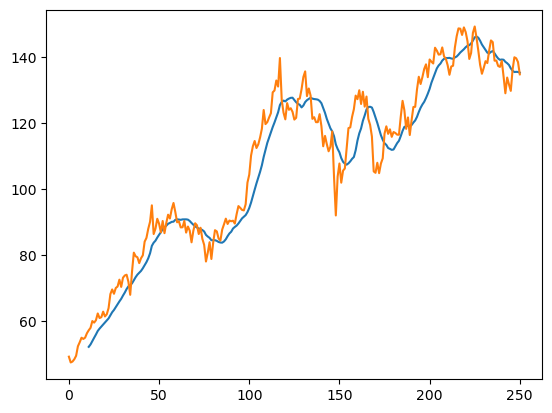

In [29]:
plt.plot(np.arange(len(Open_price)), Open_price_ma)
plt.plot(np.arange(len(Open_price)), Open_price)
plt.show()